<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/c/dlschool-fashionmnist3. Вам нужно скачать оттуда всё из раздела `Data`, далее мы будем работать с этим - обучаться на train и предсказывать на test.</b></h3> 

<h4 style="text-align: center;"><b>Оргиниальный датасет: https://www.kaggle.com/zalando-research/fashionmnist</b></h4> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [4]:
import pandas as pd

In [5]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [6]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [7]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [8]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [10]:
train_df.shape

(60000, 785)

In [11]:
test_df.shape

(10000, 784)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
image_png = plt.imread('./fpmi_logo.png')

In [14]:
image_png

array([[[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]],

       [[0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

* Посмотрим на тип загруженного объекта:

In [15]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [16]:
image_png.shape

(716, 2232, 4)

In [17]:
image_png[0].shape

(2232, 4)

In [18]:
image_png[0]

array([[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]], dtype=float32)

In [19]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [20]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [21]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

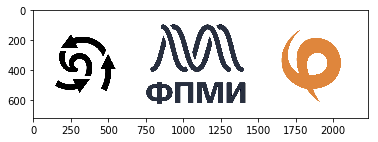

In [22]:
plt.imshow(image_png);

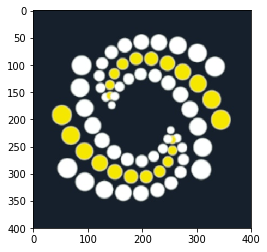

In [23]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [24]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [25]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [26]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [27]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [28]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [29]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

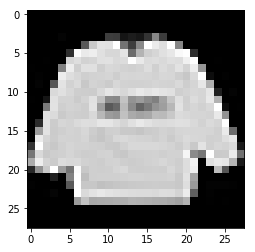

In [30]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [31]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [32]:
torch.__version__

'1.0.1'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [33]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [34]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [35]:
y_train_tensor.unique()

tensor([2, 9, 6, 8, 0, 3, 4, 5, 7, 1])

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [38]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [39]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [40]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязательно убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [41]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

c:\_work\env-deeplearn\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
c:\_work\env-deeplearn\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0, 100] current loss: 141.96453857421875
[0, 200] current loss: 144.83622329711915
[0, 300] current loss: 140.35390243530273
[0, 400] current loss: 140.54035232543944
[0, 500] current loss: 139.69982055664062
[0, 600] current loss: 139.1816426086426
[0, 700] current loss: 139.2382717895508
[0, 800] current loss: 139.11978019714354
[0, 900] current loss: 139.63336380004884
[1, 100] current loss: 139.41224548339844
[1, 200] current loss: 140.03013412475585
[1, 300] current loss: 139.27758346557619
[1, 400] current loss: 140.1528926086426
[1, 500] current loss: 139.57215560913085
[1, 600] current loss: 138.42930358886719
[1, 700] current loss: 139.0770083618164
[1, 800] current loss: 139.1042975616455
[1, 900] current loss: 139.26515884399413
[2, 100] current loss: 139.21136962890625
[2, 200] current loss: 139.91803741455078
[2, 300] current loss: 139.37486251831055
[2, 400] current loss: 139.9573908996582
[2, 500] current loss: 139.30469360351563
[2, 600] current loss: 138.6641780090332

[21, 600] current loss: 128.34500625610352
[21, 700] current loss: 129.324482421875
[21, 800] current loss: 129.60678909301757
[21, 900] current loss: 129.45868560791016
[22, 100] current loss: 129.23875183105469
[22, 200] current loss: 129.75118911743164
[22, 300] current loss: 129.04723335266112
[22, 400] current loss: 129.90529678344726
[22, 500] current loss: 129.42890747070314
[22, 600] current loss: 128.14618133544923
[22, 700] current loss: 129.11758827209474
[22, 800] current loss: 129.6552587890625
[22, 900] current loss: 129.33638977050782
[23, 100] current loss: 129.44018920898438
[23, 200] current loss: 131.66089225769042
[23, 300] current loss: 129.48946640014648
[23, 400] current loss: 129.4532022857666
[23, 500] current loss: 129.1080313873291
[23, 600] current loss: 128.48133155822754
[23, 700] current loss: 129.13860610961913
[23, 800] current loss: 129.7928857421875
[23, 900] current loss: 129.5531227874756
[24, 100] current loss: 129.30009651184082
[24, 200] current 

[42, 900] current loss: 125.17066719055175
[43, 100] current loss: 125.19615516662597
[43, 200] current loss: 126.72079780578613
[43, 300] current loss: 125.28813575744628
[43, 400] current loss: 125.57918144226075
[43, 500] current loss: 125.18761489868164
[43, 600] current loss: 124.85364570617676
[43, 700] current loss: 125.20717948913574
[43, 800] current loss: 127.00616020202636
[43, 900] current loss: 126.06362503051758
[44, 100] current loss: 125.19457122802734
[44, 200] current loss: 126.52121215820313
[44, 300] current loss: 125.32413276672364
[44, 400] current loss: 125.64671531677246
[44, 500] current loss: 124.62049201965333
[44, 600] current loss: 125.42219886779785
[44, 700] current loss: 125.05654273986816
[44, 800] current loss: 125.01425910949708
[44, 900] current loss: 125.59243392944336
[45, 100] current loss: 126.1790421295166
[45, 200] current loss: 125.87226501464843
[45, 300] current loss: 124.61972328186035
[45, 400] current loss: 125.94065551757812
[45, 500] cu

[64, 300] current loss: 120.67080833435058
[64, 400] current loss: 122.29826690673828
[64, 500] current loss: 120.89963569641114
[64, 600] current loss: 120.65140602111816
[64, 700] current loss: 122.14554840087891
[64, 800] current loss: 120.74141540527344
[64, 900] current loss: 121.72886787414551
[65, 100] current loss: 121.34542831420899
[65, 200] current loss: 122.05118072509765
[65, 300] current loss: 120.40264312744141
[65, 400] current loss: 122.41496543884277
[65, 500] current loss: 121.08831359863281
[65, 600] current loss: 121.23307090759278
[65, 700] current loss: 121.44382270812989
[65, 800] current loss: 121.00477928161621
[65, 900] current loss: 121.02078620910645
[66, 100] current loss: 121.92534286499023
[66, 200] current loss: 122.0028443145752
[66, 300] current loss: 120.25392471313477
[66, 400] current loss: 122.09669708251953
[66, 500] current loss: 120.06742362976074
[66, 600] current loss: 120.62283798217773
[66, 700] current loss: 121.08502952575684
[66, 800] cu

[85, 600] current loss: 121.04363716125488
[85, 700] current loss: 121.33282806396484
[85, 800] current loss: 120.61345603942871
[85, 900] current loss: 120.42968132019043
[86, 100] current loss: 120.47687698364258
[86, 200] current loss: 122.30838409423828
[86, 300] current loss: 119.83359580993653
[86, 400] current loss: 122.09194587707519
[86, 500] current loss: 121.35091926574707
[86, 600] current loss: 121.19607551574707
[86, 700] current loss: 121.30936103820801
[86, 800] current loss: 120.28283699035644
[86, 900] current loss: 120.64581733703614
[87, 100] current loss: 120.29934661865235
[87, 200] current loss: 121.88447273254394
[87, 300] current loss: 120.03460624694824
[87, 400] current loss: 122.38279510498047
[87, 500] current loss: 120.74558074951172
[87, 600] current loss: 120.5179825592041
[87, 700] current loss: 120.76488014221191
[87, 800] current loss: 120.17133125305176
[87, 900] current loss: 121.06346176147461
[88, 100] current loss: 121.34530296325684
[88, 200] cu

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [42]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 91 %
Accuracy of Trouser :  0 %
Accuracy of Pullover : 85 %
Accuracy of Dress : 91 %
Accuracy of  Coat : 50 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 49 %
Accuracy of Sneaker :  0 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot :  0 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [43]:
y_test_pred = net(torch.FloatTensor(X_test))

In [44]:
y_test_pred.shape

torch.Size([10000, 10])

In [45]:
y_test_pred[:5]

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [46]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([0, 3, 2,  ..., 8, 8, 2])

Сохраним в датафрейм:

In [47]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,0
1,3
2,2
3,0
4,3


In [48]:
answer_df['Id'] = answer_df.index

In [49]:
answer_df.head()

,Category,Id
0,0,0
1,3,1
2,2,2
3,0,3
4,3,4


In [50]:
answer_df.tail()

,Category,Id
9995,0,9995
9996,6,9996
9997,8,9997
9998,8,9998
9999,2,9999


Отлично, созраним в файл и отправим:

In [51]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'


X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))
print(X_train_tensor.shape, y_train_tensor.shape)

y_train_tensor.unique()

length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)


# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Linear(H, H),
    torch.nn.Linear(H, H),
    torch.nn.Linear(H, H),
    torch.nn.Linear(H, H),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch
        

BATCH_SIZE = 10
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')

learning_rate = 1e-6
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 1000 == 0:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num, running_loss / 1000))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1
        
        
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    
    
y_test_pred = net(torch.FloatTensor(X_test))
_, predicted = torch.max(y_test_pred, 1)

answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()
answer_df['Id'] = answer_df.index
answer_df.to_csv('./baseline.csv', index=False)

torch.Size([60000, 784]) torch.Size([60000])
tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])
[0, 0] current loss: 0.023507530212402344
[0, 1000] current loss: 22.768105600357057
[0, 2000] current loss: 22.42996095085144
[0, 3000] current loss: 22.220409732818602
[0, 4000] current loss: 21.97210410118103
[0, 5000] current loss: 21.77132554244995
[1, 0] current loss: 0.021702638626098635
[1, 1000] current loss: 21.49576410293579
[1, 2000] current loss: 21.299723194122315
[1, 3000] current loss: 21.294127498626708
[1, 4000] current loss: 21.140064868927002
[1, 5000] current loss: 21.073078639984132
[2, 0] current loss: 0.020419952392578124
[2, 1000] current loss: 21.000912551879882
[2, 2000] current loss: 20.86727604866028
[2, 3000] current loss: 20.9155

[30, 2000] current loss: 18.79639186668396
[30, 3000] current loss: 18.865425451278686
[30, 4000] current loss: 18.77661566066742
[30, 5000] current loss: 18.86125455570221
[31, 0] current loss: 0.01681709671020508
[31, 1000] current loss: 18.83002237701416
[31, 2000] current loss: 18.786078437805177
[31, 3000] current loss: 18.854295446395874
[31, 4000] current loss: 18.766111751556398
[31, 5000] current loss: 18.850814727783202
[32, 0] current loss: 0.01681538963317871
[32, 1000] current loss: 18.81989649391174
[32, 2000] current loss: 18.776390027999877
[32, 3000] current loss: 18.843759922027587
[32, 4000] current loss: 18.75619024658203
[32, 5000] current loss: 18.840894953727723
[33, 0] current loss: 0.01681666374206543
[33, 1000] current loss: 18.81036842441559
[33, 2000] current loss: 18.7671962890625
[33, 3000] current loss: 18.8337171792984
[33, 4000] current loss: 18.746832962989807
[33, 5000] current loss: 18.8315165309906
[34, 0] current loss: 0.016818716049194337
[34, 100

[61, 5000] current loss: 18.683502482414244
[62, 0] current loss: 0.016986948013305664
[62, 1000] current loss: 18.657971934318542
[62, 2000] current loss: 18.61907987308502
[62, 3000] current loss: 18.669202593803405
[62, 4000] current loss: 18.596264510154725
[62, 5000] current loss: 18.680353861808776
[63, 0] current loss: 0.0169919376373291
[63, 1000] current loss: 18.65485693359375
[63, 2000] current loss: 18.616078901290894
[63, 3000] current loss: 18.665832220077515
[63, 4000] current loss: 18.593249987602235
[63, 5000] current loss: 18.677242527008058
[64, 0] current loss: 0.016995634078979492
[64, 1000] current loss: 18.6517981967926
[64, 2000] current loss: 18.613129559516906
[64, 3000] current loss: 18.66253560447693
[64, 4000] current loss: 18.59027992916107
[64, 5000] current loss: 18.67420839691162
[65, 0] current loss: 0.016998592376708983
[65, 1000] current loss: 18.64882285499573
[65, 2000] current loss: 18.6102875957489
[65, 3000] current loss: 18.659359958648682
[65,

[93, 2000] current loss: 18.550012282371522
[93, 3000] current loss: 18.59163416957855
[93, 4000] current loss: 18.526122873306274
[93, 5000] current loss: 18.60669046497345
[94, 0] current loss: 0.017091596603393554
[94, 1000] current loss: 18.583066316604615
[94, 2000] current loss: 18.54838182258606
[94, 3000] current loss: 18.589767439842223
[94, 4000] current loss: 18.52443751144409
[94, 5000] current loss: 18.60488122367859
[95, 0] current loss: 0.01709240531921387
[95, 1000] current loss: 18.58136598777771
[95, 2000] current loss: 18.546784690856935
[95, 3000] current loss: 18.587951139450073
[95, 4000] current loss: 18.52280090045929
[95, 5000] current loss: 18.60312019634247
[96, 0] current loss: 0.017092208862304687
[96, 1000] current loss: 18.57967922306061
[96, 2000] current loss: 18.545186526298522
[96, 3000] current loss: 18.586154582977294
[96, 4000] current loss: 18.52120300579071
[96, 5000] current loss: 18.601393137931822
[97, 0] current loss: 0.01709258460998535
[97,

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*